<a href="https://colab.research.google.com/github/blacktruth513/Sentimental-Analysis-on-Movie_Reviews/blob/main/Sentimental_Analysis_on_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d utmhikari/doubanmovieshortcomments
!unzip doubanmovieshortcomments.zip

Saving kaggle.json to kaggle.json
 92% 132M/144M [00:01<00:00, 83.5MB/s]
100% 144M/144M [00:01<00:00, 106MB/s] 
Archive:  doubanmovieshortcomments.zip
  inflating: DMSC.csv                


 <img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# Section4 Project

---

#<center> **<딥러닝 기반 豆瓣 영화 리뷰 NLP 감정 분석 프로젝트>** </center>

---
<br>

##- 프로젝트 순서 - 
<br>

1.  프로젝트 주제  
<br>

2. 데이터 선정 이유 및 데이터 소개 / 프로젝트 문제 정의 
<br>

3. 데이터 전처리 
<br> 
<br>

4. 데이터 모델링 준비 
<br>

5. 데이터 모델링 및 모델 해석
<br>

6. 데이터 예측 및 결론 
<br>
<br>




# 1. 프로젝트 주제 


- 주어진 데이터를 활용하여 NLP 모델을 기반으로 영화 리뷰 내용의 평점에 대한 감정 분석(분류)을 실시한다.  

# 2. 데이터 선정 이유 및 데이터 소개 / 프로젝트 문제 정의

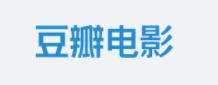

- 豆瓣电影은 중국의 영화 종합 사이트로서, 약 210만 개의 영화 리뷰, 평점 데이터를 사용하여 이번 섹션에서 배운 딥러닝 개념을 적용하여 일반적으로 쓰이는 영어 데이터가 아닌 중국어 데이터를 활용한 프로젝트를 수행함으로서, NLP(자연어 처리) 모델에 대한 이해를 확장시키는데 그 목적이 있다. 

- 문제 정의 : 주어진 데이터 타겟 변수인 평점에 대해 생성한 딥러닝 모델을 사용하여 특성 변수인 리뷰 데이터가 얼마나 특정 리뷰의 평점을 잘 예측하는지 진행하려고한다. 

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('./DMSC.csv', low_memory=False)

In [5]:
df

,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404
1,1,Avengers Age of Ultron,复仇者联盟2,2017-01-22,2,更深的白色,2015-04-24,2,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...,1231
2,2,Avengers Age of Ultron,复仇者联盟2,2017-01-22,3,有意识的贱民,2015-04-26,2,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...,1052
3,3,Avengers Age of Ultron,复仇者联盟2,2017-01-22,4,不老的李大爷耶,2015-04-23,4,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...,1045
4,4,Avengers Age of Ultron,复仇者联盟2,2017-01-22,5,ZephyrO,2015-04-22,2,虽然从头打到尾，但是真的很无聊啊。,723
...,...,...,...,...,...,...,...,...,...,...
2125051,2125051,Zootopia,疯狂动物城,2017-01-04,141196,猫的烟火尾巴,2016-03-06,4,真好看 兔子警官又美有善良又可爱~简直理想结婚对象！每一个动物造型都是那么赞~,0
2125052,2125052,Zootopia,疯狂动物城,2017-01-04,141197,Tosta,2016-03-05,5,六星好评！像头脑特工队那样惊喜！,0
2125053,2125053,Zootopia,疯狂动物城,2017-01-04,141198,風立ちぬ,2016-03-11,4,欢乐而又深刻，是童话故事更是政治寓言。,0
2125054,2125054,Zootopia,疯狂动物城,2017-01-04,141199,P I T T,2016-03-05,5,对现实世界歧视和偏见的影射妙哉妙哉，不要害怕打破常规，try everything,0


In [ ]:
!pip install histograms

  Created wheel for histograms: filename=histograms-1.0.0-py3-none-any.whl size=7083 sha256=3c02376be4f09e96dad21dd785dbbe5a23d62dba6b371ec1b5fa60e27472ad0a
  Stored in directory: /root/.cache/pip/wheels/02/8e/7c/5dac0e89caead901fab4d4629bb5008d2cc3481e0ece573253
Successfully built histograms


In [4]:
# 전처리 라이브러리 
import numpy as np
import jieba
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# 모델링 라이브러리 
import tensorflow as tf
from keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, GlobalAveragePooling1D, Input, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping

 # 시각화 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns
#from histograms import histograms

In [6]:
!pip freeze > requirements.txt

In [ ]:
df.dtypes

ID                int64
Movie_Name_EN    object
Movie_Name_CN    object
Crawl_Date       object
Number            int64
Username         object
Date             object
Star              int64
Comment          object
Like              int64
dtype: object

# 3. 데이터 전처리
<br>



## 3-1 데이터 결측값 확인 및 제거

In [ ]:
# N/A 값 확인 및 제거 
df.isnull().sum()
df = df.dropna()

## 3-2 타겟데이터(평점) 재분류

In [ ]:
# 평점 재분류 // 부정(0), 중립(1), 긍정(2)
def restar(row):
    if row == 1:
        return 0
    elif row == 2:
        return 0
    elif row == 3:
        return 1
    elif row == 4:
        return 2
    elif row == 5:
        return 2    

df['Star'] = df['Star'].apply(restar)
df['Star']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0          1
1          0
2          0
3          2
4          0
          ..
2125051    2
2125052    2
2125053    2
2125054    2
2125055    2
Name: Star, Length: 2124907, dtype: object

In [ ]:
print(df['Star'].unique())
print(df['Star'].value_counts())

[1 0 2]
2    1279804
1     474532
0     370571
Name: Star, dtype: int64


## 3-3 중국어 토크나이징

### 불용어 사전을 적용한 중국어 토크나이징 프로세스 with Jieba 

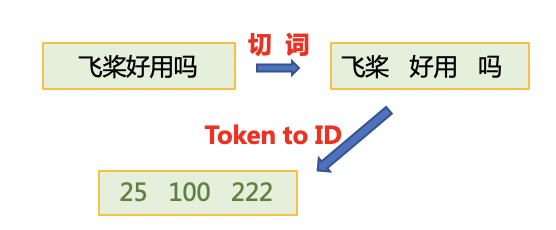

In [ ]:
# 불용어 사전 정리 
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r').readlines()] 
    return stopwords 

stopwords = stopwordslist('/content/drive/MyDrive/AI_Bootcamp/Data/百度停用词表.txt')

print('------------------------ 불용어 사전 ------------------------------------')
print(stopwords)

# token 분리  # 32분 소요
def chinese_word_cut(mytext):
    mytext = " ".join([w for w in list(jieba.cut(mytext)) if w not in stopwords])
    return " ".join(jieba.cut(mytext))

------------------------ 불용어 사전 ------------------------------------
['--', '?', '“', '”', '》', '－－', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', "a's", 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'came', 'can', 'cannot', 'cant', "can't", 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', "c'mon", 'co', 'com', 'come', 'comes', 'concerni

In [ ]:
df['Comment'] = df['Comment'].apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.793 seconds.
Prefix dict has been built successfully.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 토크나이징 결과 확인

In [ ]:
# 토크나이징 결과 확인
df['Comment'].head(100)

0                              奥创   都   整容   去   韩国   。
1         失望   ，   剧本   敷衍了事   ，   主线   剧情   没   突破 ...
2         2015   年度   最   失望   作品   。   面面俱到   ，   实...
3         《   铁人   2   中   勾引   钢铁   侠   ，   《   妇联 ...
4                    从头   打 到   尾   ，   真的   很   无聊   。
                            ...                        
95                                             Shi   剧情
96        通篇   洋溢着   「   鸡巴   大   先   说   」   直   男 ...
97        刘大勇   你好   ！   字幕   翻译   太烂   ，   节奏   不连贯...
98        笑   点   满满   ，   热血   高能   前作   相比   ，   一...
99        复联   基本上   情景喜剧   路线   上   拍   ，   人   固定 ...
Name: Comment, Length: 100, dtype: object

# 4. 데이터 모델링 준비

###4-1 특성 변수 및 타겟 선정, 데이터 분할

In [ ]:
# 특성 변수 및 타겟 선정
X = df.Comment.astype('str') # 특성변수
y = df['Star'] ## 타겟변수(0-2) 

# 데이터 분할 // 학습/검증/테스트(6:2:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 트레인 - 테스트셋 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42) # 트레인 - 검증셋 분리

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)

(1359940,) (1359940,) (339985,) (339985,) (424982,) (424982,)


###4-2 모델링을 위한 단어 벡터화

In [ ]:
# 문서 평균 길이
print(f'Mean length of train set: {np.mean([len(sent) for sent in X_train], dtype=int)}')

Mean length of train set: 76


In [ ]:
#단어 토크나이징
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train) # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성

In [ ]:
## 使用word_index属性可以看到每次词对应的编码
## 使用word_counts属性可以看到每个词对应的频数
for ii,iterm in enumerate(tokenizer.word_index.items()): # 단어별 id값 할당 여부 확인 
    if ii < 50:
        print(iterm)
    else:
        break
print("===================")  
for ii,iterm in enumerate(tokenizer.word_counts.items()): # 단어 카운트 
    if ii < 20:
        print(iterm)
    else:
        break

('，', 1)
('。', 2)
('！', 3)
('看', 4)
('很', 5)
('电影', 6)
('都', 7)
('不', 8)
('好', 9)
('…', 10)
('人', 11)
('剧情', 12)
('还', 13)
('？', 14)
('不错', 15)
('说', 16)
('没', 17)
('喜欢', 18)
('太', 19)
('好看', 20)
('一个', 21)
('真的', 22)
('去', 23)
('感觉', 24)
('故事', 25)
('特效', 26)
('笑', 27)
('一部', 28)
('想', 29)
('、', 30)
('画面', 31)
('挺', 32)
('会', 33)
('上', 34)
('完', 35)
('这部', 36)
('最', 37)
('中', 38)
('片子', 39)
('拍', 40)
('点', 41)
('小', 42)
('演技', 43)
('里', 44)
('很多', 45)
('中国', 46)
('国产', 47)
('看过', 48)
('爱', 49)
('大', 50)
('希望', 19610)
('最最', 487)
('昂贵', 51)
('东西', 13512)
('说', 98462)
('特别', 20656)
('好看', 90970)
('，', 2208894)
('喜欢', 93019)
('。', 1127406)
('岳父', 1538)
('脑', 2715)
('残粉', 2680)
('手', 2448)
('撕', 5884)
('闺蜜', 2699)
('拍', 42104)
('出新', 403)
('高度', 2225)
('挺好玩', 517)


In [ ]:
#texts_to_sequences (단어 벡터화)
train_seq = tokenizer.texts_to_sequences(X_train)
valid_seq = tokenizer.texts_to_sequences(X_valid)
test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
# padding(문장 길이 픽스)
train_pad = sequence.pad_sequences(train_seq, maxlen=max_len)
valid_pad = sequence.pad_sequences(valid_seq, maxlen=max_len)
test_pad = sequence.pad_sequences(test_seq, maxlen=max_len)

print(train_pad.shape)
print(valid_pad.shape)
print(test_pad.shape)

(1359940, 100)
(339985, 100)
(424982, 100)


# 5. 데이터 모델링 및 모델 해석

In [ ]:
# 랜덤 시드 고정 
np.random.seed(42)
tf.random.set_seed(42)

## 5-1 모델 정의 / 사용 모델 : LSTM

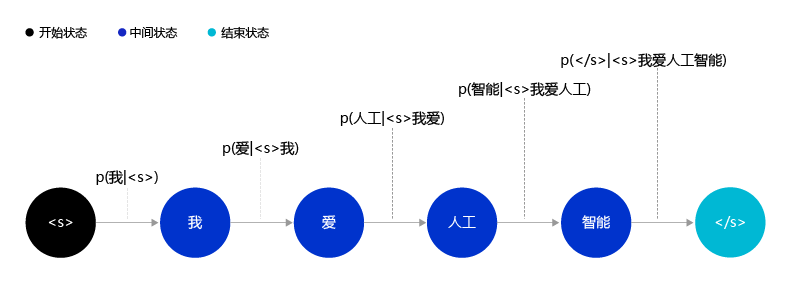

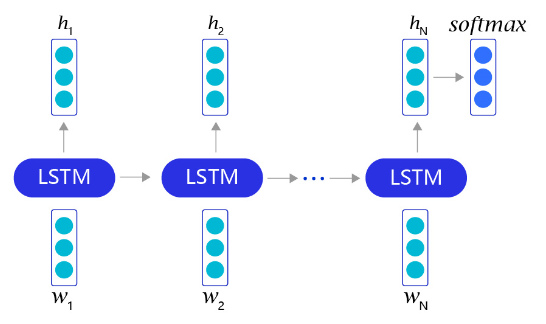

In [ ]:
## 모델 정의
inputs = Input(name='inputs',shape=[max_len])
layer = Embedding(max_words+1,128,input_length=max_len)(inputs)
layer = LSTM(128)(layer)
layer = Dense(128,activation='relu', kernel_regularizer=regularizers.l2(0.00001),   
                activity_regularizer=regularizers.l1(0.00001), name='FC1')(layer)
layer = Dropout(0.2)(layer)
layer = Dense(3,activation='softmax',name='FC2')(layer)
model = Model(inputs=inputs,outputs=layer)
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 128)          640128    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
FC1 (Dense)                  (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 3)                 387       
Total params: 788,611
Trainable params: 788,611
Non-trainable params: 0
_______________________________________________________

## 5-2 모델링(모델 학습)

In [ ]:
## 모델링
model_fit = model.fit(train_pad, y_train, batch_size=128, epochs=10,
                      validation_data=(valid_pad, y_valid), verbose=1)

Epoch 1/10
10625/10625 [==============================] - 2719s 256ms/step - loss: 0.6618 - accuracy: 0.7156 - val_loss: 0.6367 - val_accuracy: 0.7269
Epoch 2/10
10625/10625 [==============================] - 2723s 256ms/step - loss: 0.6274 - accuracy: 0.7322 - val_loss: 0.6223 - val_accuracy: 0.7342
Epoch 3/10
10625/10625 [==============================] - 2802s 264ms/step - loss: 0.6175 - accuracy: 0.7375 - val_loss: 0.6232 - val_accuracy: 0.7336
Epoch 4/10
10625/10625 [==============================] - 2762s 260ms/step - loss: 0.6125 - accuracy: 0.7406 - val_loss: 0.6191 - val_accuracy: 0.7347
Epoch 5/10
10625/10625 [==============================] - 2829s 266ms/step - loss: 0.6090 - accuracy: 0.7424 - val_loss: 0.6233 - val_accuracy: 0.7349
Epoch 6/10
10625/10625 [==============================] - 3032s 285ms/step - loss: 0.6068 - accuracy: 0.7442 - val_loss: 0.6198 - val_accuracy: 0.7366
Epoch 7/10
10625/10625 [==============================] - 3040s 286ms/step - loss: 0.6043 - ac

## 5-3 모델 해석

In [ ]:
accuracy = model.evaluate(test_pad, y_test)

13281/13281 [==============================] - 457s 34ms/step - loss: 0.6278 - accuracy: 0.7367


- 테스트셋 정확도

In [ ]:
print('Test set\n  Loss: {:0.4f}\n  Accuracy: {:0.4f}'.format(accuracy[0], accuracy[1]))

Test set
  Loss: 0.6278
  Accuracy: 0.7367


# 6. 데이터 예측 및 결론

## 6-1 테스트셋 예측 및 실제 데이터값과 비교

In [ ]:
test_review = model.predict(test_pad)

In [ ]:
# 임의 평점 예측값
predict_labels = np.argmax(test_review, axis=1) 

In [ ]:
predict_labels[10000:10051]

array([1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       1, 0, 2, 0, 1, 0, 2])

In [ ]:
# 실제 데이터값
sample_y_test = y_test.iloc[10000:10051]

In [ ]:
print(sample_y_test.to_numpy())

[1 1 2 2 2 0 2 1 2 0 2 2 2 1 2 2 2 2 2 1 2 1 0 1 2 2 2 2 2 1 2 2 2 2 1 2 2
 0 2 0 2 2 1 1 2 2 2 1 1 0 2]


- 임의로 지정한 인덱스가 10000부터 10051까지의 50개의 실제 테스트 데이터값과 예측값을 비교한 결과 약 80%의 값이 일치한다. 

- 해당하는 인덱스의 원본값 확인

In [ ]:
# 원본 리뷰 및 평점 출력값
test_review.iloc[10000:10051]

,Comment,Star
591121,三藏和段小姐的爱情故事~还可以 笑点都有点冷啊 和大话西游不好比的啊 观众确实也越来越难伺...,1
1279107,场景设计，人物造型，3D特效加分，据说是广电下命令不能怪力乱神所以瞎编了很多应付的？那这电...,1
1034653,导演还是有一定水平的，两次反转这种至少很对我胃口。（最打动我的是七月第一次找到工作跑像家明...,2
1801610,男主一行人找到大部队，却被勒令离开...我有点搞不懂那群人怎么想的。（就算要走，走的也应该...,2
1744273,还是那句话 最可怕的是人心 不过我也没法站在道德的制高点上去判断好坏，在限定的紧急情况下，...,2
126948,人物关系很恶心，对话很矫情，在电影院看跟看老炮儿一样坐着很恼火，要睡着！,0
554577,非常不错，笑中带泪。忍不住想看第二遍,2
780211,理想之境（LA LA LAND）永远丰满迷人，而现实是，有所得必有所失。导演的取向在开头场...,1
1338755,本来抱着又一国产烂片的目的去看的 结果貌似各方面都没什么缺陷 有笑点有情节有特效 尤...,2
953498,黄晓明和杨幂还能要求多少呢？女主中学时期不能走心点找顶好看的假发吗？跟个老太婆似的。片中加...,0


## 6-2 프로젝트 결론 

- epochs 수 조절 등의 추가적인 하이퍼파라미터값을 튜닝할 경우 좀 더 개선된 예측모델이 될 수 있을 것이다. 또한 bert 등의 발전된 모델을 사용하여 다시 모델링을 진행할 계획이다. 